In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import re

from toxic_text.features.stylometric.lexical import CharacterFeatures
from toxic_text.features.stylometric.word import WordFeatures

In [3]:
df_train = pd.read_csv('../dataset/train.csv')

In [4]:
df_test = pd.read_csv('../dataset/test.csv')

In [7]:
def get_features(docs):
    char_features = CharacterFeatures(docs)
    
    upper_case_ratio = char_features.upper_case_ratio()
    char_count = char_features.get_char_count()
    nb_exclamation_points = char_features.get_nb_exclamation_points()
    
    word_features = WordFeatures(docs)
    herdans_c = word_features.get_herdans_c(docs)
    avg_word_length = word_features.get_average_word_length()
    word_counts = word_features.get_word_counts()
    
    features = pd.concat([upper_case_ratio, char_count, nb_exclamation_points, 
                         herdans_c, avg_word_length, word_counts], axis=1)
    features.columns = ['upper_case_ratio', 'char_count', 'nb_exclamation_points', 
                         'herdans_c', 'avg_word_length', 'word_counts']
    
    return features

In [8]:
train_features = get_features(df_train.comment_text)

In [9]:
test_features = get_features(df_test.comment_text)

KeyboardInterrupt: 

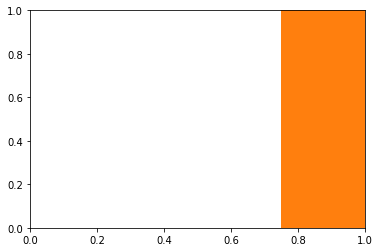

In [13]:
%matplotlib inline

train_features.nb_exclamation_points.plot(kind='bar')

In [ ]:
%matplotlib inline

train_features.herdans_c.plot(kind='hist')

In [ ]:
train_features